In [1]:
import pandas as pd
import numpy as np

from astropy.io import fits 
from astropy.wcs import WCS

img = fits.open('acs_I_030mas_065_sci.fits')[0].data
hdr = fits.open('acs_I_030mas_065_sci.fits')[0].header

w = WCS(hdr)
sky0 = w.pixel_to_world(200, 200)
sky1 = w.pixel_to_world(20200, 20200)
print (sky0 )
print (sky1)


dataframe = pd.read_csv('gz_hubble_main.csv')

cosmos_df = dataframe.loc[dataframe['imaging'] == 'COSMOS']
cosmos_df = cosmos_df.loc[(cosmos_df['Z_BEST'] >= 0.5)&(cosmos_df['Z_BEST'] <= 1.5)]
cosmos_df = cosmos_df.loc[(cosmos_df['t01_smooth_or_features_a02_features_or_disk_fraction'] >= 0.23)]
cosmos_df = cosmos_df.loc[(cosmos_df['RA'] > sky1.ra.deg)&(cosmos_df['RA'] < sky0.ra.deg)]
cosmos_df = cosmos_df.loc[(cosmos_df['DEC'] > sky0.dec.deg)&(cosmos_df['DEC'] < sky1.dec.deg)]
# cosmos_df = cosmos_df.loc[(cosmos_df['ra'] >= 0.8)]


print (cosmos_df)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (150.22786867, 2.12593578)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (150.06108134, 2.29260528)>
       zooniverse_id  survey_id   Table          RA       DEC   Z_BEST  \
44404     AHZ2000j39   20063984  hubble  150.173091  2.126923  1.42600   
44735     AHZ2000jcg   20064906  hubble  150.085015  2.127054  1.26300   
44736     AHZ2000jch   20064907  hubble  150.123664  2.126605  0.95300   
44786     AHZ2000jdv   20065384  hubble  150.137957  2.126013  0.94700   
52805     AHZ2000pkm   20087227  hubble  150.227409  2.254898  0.72920   
...              ...        ...     ...         ...       ...      ...   
100677    AHZ2001qie   20092014  hubble  150.115556  2.206370  0.53000   
100682    AHZ2001qij   20092233  hubble  150.114066  2.202888  0.82900   
100691    AHZ2001qis   20092666  hubble  150.062487  2.275157  0.83859   
100768    AHZ2001qkx   20094853  hubble  150.062513  2.133044  0.67100   
104441    AHZ2001tey  

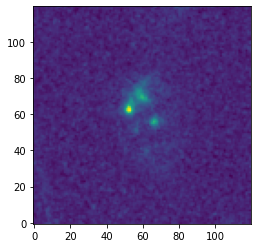

6768.109999929336 317.55116875970816


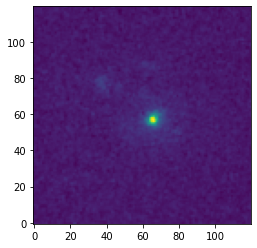

17329.960070336867 333.19540248977137


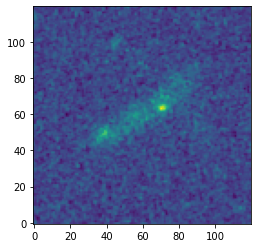

12695.17504091103 279.2556408976452


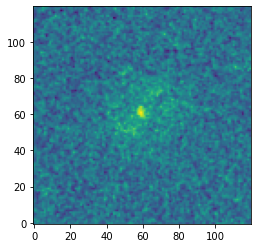

10981.30158181221 208.2197079912312


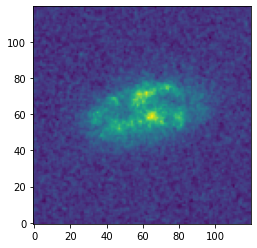

255.51700302308018 15674.929970301004


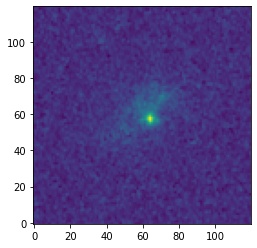

10091.83893439158 18088.355455116533


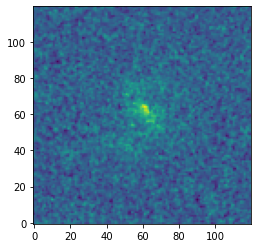

9197.147645524234 17927.04753359375


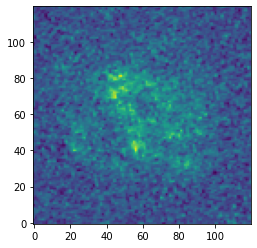

1439.704560238406 17861.08173559868


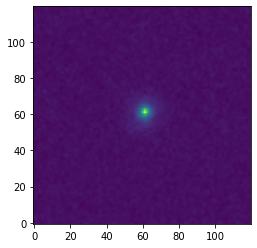

8033.196390426125 17453.20005749734


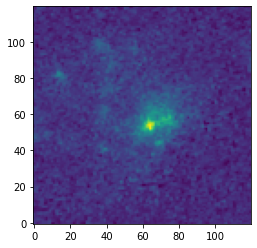

1516.0376351534633 17696.531883076488


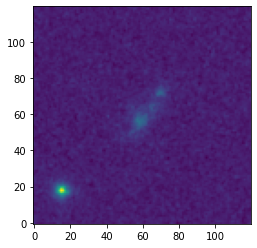

6454.70947804398 16959.132822662934


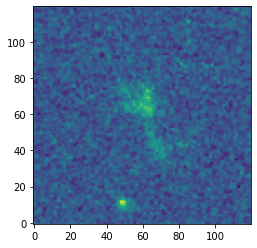

3257.7139987933515 16939.62539118664


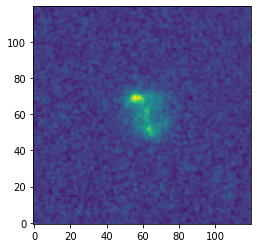

6391.9329516007265 16821.855158328806


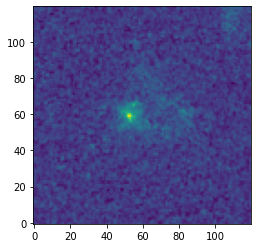

9440.798568187753 16487.015253352336


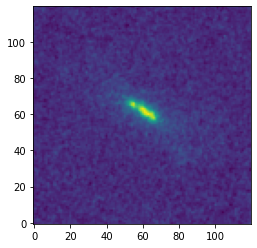

6236.985741253214 16432.064946950995


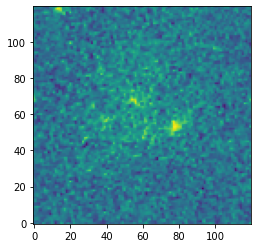

5588.326261688609 16437.229546150855


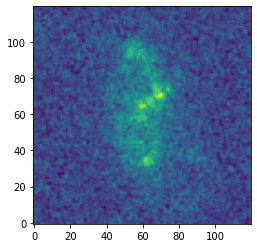

6737.59354071169 16355.8324104462


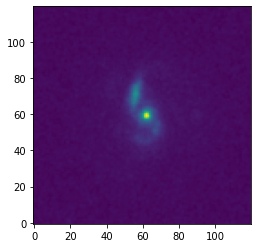

6153.169248026159 20142.80138641043


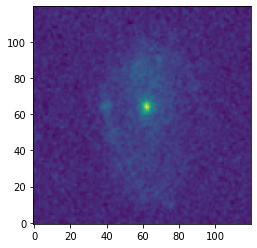

6282.720404857185 16192.854622292522


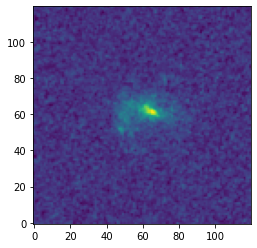

1700.2907506694555 20122.435728650475


In [2]:
from astropy.coordinates import SkyCoord

ras = np.array(cosmos_df['RA'])[:20]
decs = np.array(cosmos_df['DEC'])[:20]

import matplotlib.pyplot as plt
size = 60

for ra, dec in zip(ras, decs):
    sky = SkyCoord(ra, dec, unit="deg")
    x, y = w.world_to_pixel(sky) 
    
    plt.imshow(img[int(y-size):int(y+size), int(x-size):int(x+size)], origin='lower')
    plt.show()
    
    tmpimg = img[int(y-size):int(y+size), int(x-size):int(x+size)]
    print (x, y)
    
    

In [25]:
%load_ext autoreload
%autoreload 2
from clumpyClassifier import BinaryModel
# print (tmpimg.ravel())

ml = BinaryModel(trainingData=np.arange(3).reshape((3,1)), trainingClass=np.arange(1).reshape((1,1)),  layer_dims = [10,10,1])
# weights, biases = ml.train(test_images=np.arange(3))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['dZ3', 'dW3', 'dB3', 'dA2', 'dZ2', 'dW2', 'dB2', 'dA1', 'dZ1', 'dW1', 'dB1'])


In [12]:
a = np.arange(6).reshape((3,2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
np.int64(a>2)

array([[0, 0],
       [0, 1],
       [1, 1]])

In [14]:
for i in range(1,3):
    print (i)

1
2


In [1]:
from tf.keras.datasets import mnist

ModuleNotFoundError: No module named 'tf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0]]


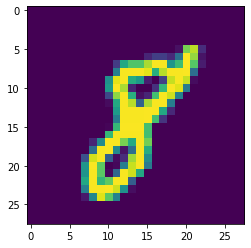

  0%|          | 0/20000 [00:00<?, ?it/s]

learning rate = 0.005
number of iterations = 20000


100%|██████████| 20000/20000 [00:12<00:00, 1606.45it/s]

[[3.29576298e-036 1.68181585e-050 3.86415454e-040 8.78371385e-022
  4.05537651e-049 2.10254206e-047 7.99765790e-031 1.14974470e-018
  2.07564938e-032 1.01638213e-054 2.43095350e-077 2.05425886e-025
  1.19878590e-042 9.60111576e-049 3.03864797e-036 1.54349648e-060
  1.70443397e-047 9.99998954e-001 1.01874738e-023 1.32290172e-022
  1.29354413e-090 1.09136960e-039 4.27243955e-030 5.25014814e-022
  5.16914311e-045 1.93531496e-029 1.36931074e-048 3.30850034e-063
  1.26492489e-062 3.39006456e-045 1.61133303e-049 1.00000000e+000
  1.40033211e-057 3.69610326e-035 1.10327572e-039 1.41729351e-021
  1.64666585e-019 1.46227537e-050 2.36766157e-029 1.29840976e-038
  7.72289375e-038 9.99997975e-001 2.38238855e-022 1.14453882e-031
  5.13505870e-039 5.12629514e-012 9.99999998e-001 3.08628215e-013
  1.14930934e-062 4.05335344e-030 3.44999277e-078 3.13165545e-040
  2.79862751e-076 1.82700436e-056 6.53825556e-038 9.99999998e-001
  4.11130961e-031 7.68782338e-037 1.04269778e-118 3.78973084e-032
  6.899119

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
from clumpyClassifier import BinaryModel


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


m = 100
x_train = x_train[:m]
y_train = y_train[:m]
print (y_train)

y_train[y_train!=8] = 0
y_train[y_train==8] = 1

x_train = x_train.reshape( (m, 28**2) )
x_train = np.swapaxes(x_train,0,1)
y_train = y_train[np.newaxis, :]
print (y_train)

plt.imshow(x_train[:,17].reshape(28,28))
plt.show()

# print (x_train.shape)

ml = BinaryModel(x_train, y_train,  layer_dims = [28, 28, 1], keep_prob=0.75, alpha=0.005, iter_=20000)
ml.train()
predictions = ml.get_prediction()

# print (predictions[predictions>0.5].shape)